# Explore twitter data downloaded from internet

In [1]:
%load_ext autoreload
%autoreload 2

import src.data_utils.processing as processing
import src.data_utils.loaders as loaders
import src.data_utils.utils as utils
import src.config.config as config
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
 


## Load data

Source is described in README.md.

In [2]:
musk_posts_df = loaders.load_data(
    config.RAW_DIR,
    config.RAW_TWEETS_POSTS,
    types=config.POSTS_DTYPES,
    skiprows=1,
)


first_date = musk_posts_df["created_at"].min()
last_date = musk_posts_df["created_at"].max()

print(f"Initial Musk posts loaded: {len(musk_posts_df)} rows. ")
print(f"Timeline starts {first_date} ends {last_date}")

Initial Musk posts loaded: 55099 rows. 
Timeline starts 2010-06-04 18:31:57+00:00 ends 2025-04-13 21:28:44+00:00


In [3]:
musk_quote_df = loaders.load_data(
    config.RAW_DIR,
    config.RAW_TWEETS_QUOTE,
    types=config.QUOTE_DTYPES,
    skiprows=1,
)

first_date = musk_quote_df["created_at"].min()
last_date = musk_quote_df["created_at"].max()

print(f"Initial Musk posts loaded: {len(musk_quote_df)} rows. ")
print(f"Timeline starts {first_date} ends {last_date}")

Initial Musk posts loaded: 7273 rows. 
Timeline starts 2015-06-27 11:25:51+00:00 ends 2025-04-13 14:39:37+00:00


## First small inspection

In [4]:
musk_posts_df.info()
musk_posts_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55099 entries, 0 to 55098
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          55099 non-null  int64  
 1   url                         55099 non-null  string 
 2   twitter_url                 55099 non-null  string 
 3   full_text                   55099 non-null  string 
 4   retweet_count               55009 non-null  Int64  
 5   reply_count                 54297 non-null  Int64  
 6   like_count                  55009 non-null  Int64  
 7   quote_count                 54271 non-null  Int64  
 8   view_count                  34455 non-null  Int64  
 9   created_at                  55099 non-null  object 
 10  bookmark_count              54271 non-null  Int64  
 11  is_reply                    54271 non-null  boolean
 12  in_reply_to_id              39497 non-null  float64
 13  conversation_id             542

,id,retweet_count,reply_count,like_count,quote_count,view_count,bookmark_count,in_reply_to_id,conversation_id,in_reply_to_user_id,quote_id
count,5.509900e+04,55009.0,54297.0,55009.0,54271.0,34455.0,54271.0,3.949700e+04,5.429700e+04,3.952100e+04,7.541000e+03
mean,1.565238e+18,5152.859841,2375.592685,41541.557581,485.358442,8839064.95603,810.181478,1.572386e+18,1.574776e+18,4.650182e+17,1.790196e+18
std,3.538849e+17,14041.809886,6747.502876,106470.338893,3075.282293,18794342.545025,3479.675005,3.104468e+17,3.446097e+17,6.253846e+17,2.077654e+17
min,1.543473e+10,0.0,0.0,0.0,0.0,1.0,0.0,1.659576e+09,1.659576e+09,1.200000e+01,1.659601e+09
25%,1.402685e+18,80.0,102.0,1351.0,8.0,68291.5,12.0,1.419324e+18,1.419782e+18,4.419640e+07,1.806650e+18
50%,1.687677e+18,276.0,271.0,4198.0,29.0,248905.0,32.0,1.672634e+18,1.691963e+18,9.401079e+08,1.855711e+18
75%,1.832968e+18,2608.0,1478.0,28588.0,205.0,8024403.0,180.5,1.805232e+18,1.834187e+18,1.106321e+18,1.886091e+18
max,1.911532e+18,610842.0,357538.0,4372808.0,439431.0,607152489.0,161373.0,1.906943e+18,1.911532e+18,1.901635e+18,1.911425e+18


The musk_posts_df dataset consists of 24 columns. For the scope of this project, the most critical features are created_at and full_text, both of which contain no missing values.

In [5]:
musk_quote_df.info()
musk_quote_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         7273 non-null   int64  
 1   orig_tweet_created_at      7273 non-null   object 
 2   orig_tweet_text            7273 non-null   string 
 3   orig_tweet_url             7273 non-null   string 
 4   orig_tweet_twitter_url     7273 non-null   string 
 5   orig_tweet_username        7273 non-null   string 
 6   orig_tweet_retweet_count   7273 non-null   int64  
 7   orig_tweet_reply_count     7273 non-null   int64  
 8   orig_tweet_like_count      7273 non-null   int64  
 9   orig_tweet_quote_count     7273 non-null   int64  
 10  orig_tweet_view_count      6760 non-null   float64
 11  orig_tweet_bookmark_count  7273 non-null   int64  
 12  musk_tweet_id              7273 non-null   int64  
 13  musk_quote_tweet_text      7273 non-null   strin

,id,orig_tweet_retweet_count,orig_tweet_reply_count,orig_tweet_like_count,orig_tweet_quote_count,orig_tweet_view_count,orig_tweet_bookmark_count,musk_tweet_id,musk_quote_retweet_count,musk_quote_reply_count,musk_quote_like_count,musk_quote_quote_count,musk_quote_view_count,musk_quote_bookmark_count
count,7.273000e+03,7273.000000,7273.000000,7.273000e+03,7273.000000,6.760000e+03,7273.000000,7.273000e+03,7273.000000,7273.000000,7.273000e+03,7273.000000,6.779000e+03,7273.000000
mean,1.795963e+18,6033.274302,2274.913791,2.884878e+04,944.528118,3.037900e+07,2046.112333,1.798553e+18,19763.530455,6822.744397,1.202764e+05,1006.276777,2.773641e+07,3182.052386
std,1.972731e+17,15664.579839,9635.632559,8.550226e+04,6443.282872,2.683384e+07,7173.923770,1.899211e+17,19181.356442,7206.559455,1.094755e+05,2290.523934,2.134681e+07,4717.062258
min,1.659601e+09,1.000000,0.000000,0.000000e+00,0.000000,1.119470e+05,0.000000,6.147565e+17,0.000000,0.000000,0.000000e+00,0.000000,2.634400e+04,0.000000
25%,1.811721e+18,950.000000,414.000000,5.620000e+03,133.000000,1.387259e+07,231.000000,1.812885e+18,6331.000000,2583.000000,4.798300e+04,237.000000,1.284028e+07,732.000000
50%,1.856108e+18,2557.000000,842.000000,1.319000e+04,307.000000,2.381763e+07,631.000000,1.856455e+18,13776.000000,4592.000000,9.109300e+04,519.000000,2.216234e+07,1702.000000
75%,1.885730e+18,6023.000000,1835.000000,2.874700e+04,740.000000,3.913353e+07,1644.000000,1.885805e+18,27074.000000,8414.000000,1.574100e+05,1123.000000,3.662712e+07,3828.000000
max,1.911425e+18,610842.000000,327580.000000,4.372808e+06,439431.000000,6.071525e+08,248921.000000,1.911429e+18,292676.000000,114074.000000,1.823758e+06,97449.000000,2.242752e+08,77714.000000


The musk_quote_df dataset consists of 21 columns. For the scope of this project, the most critical features are created_at and musk_quote_tweet_text, both of which contain no missing values.

## Deduplication

### Deduplication by all columns

In [6]:
musk_posts_duplication_count, duplicate_df = utils.find_duplicates(
    musk_posts_df, musk_posts_df.columns, musk_posts_df.columns
)

print(
    f"Number of duplicate rows={musk_posts_duplication_count} in musk_posts_df by columns {musk_posts_df.columns}."
)


musk_quote_duplication_count, duplicate_df = utils.find_duplicates(
    musk_quote_df, musk_quote_df.columns, musk_quote_df.columns
)

print(
    f"Number of duplicate rows={musk_quote_duplication_count} in musk_quote_df by columns {musk_quote_df.columns}."
)

Number of duplicate rows=0 in musk_posts_df by columns Index(['id', 'url', 'twitter_url', 'full_text', 'retweet_count', 'reply_count',
       'like_count', 'quote_count', 'view_count', 'created_at',
       'bookmark_count', 'is_reply', 'in_reply_to_id', 'conversation_id',
       'in_reply_to_user_id', 'in_reply_to_username', 'is_pinned',
       'is_retweet', 'is_quote', 'is_conversation_controlled',
       'possibly_sensitive', 'quote_id', 'quote', 'retweet'],
      dtype='object').
Number of duplicate rows=0 in musk_quote_df by columns Index(['id', 'orig_tweet_created_at', 'orig_tweet_text', 'orig_tweet_url',
       'orig_tweet_twitter_url', 'orig_tweet_username',
       'orig_tweet_retweet_count', 'orig_tweet_reply_count',
       'orig_tweet_like_count', 'orig_tweet_quote_count',
       'orig_tweet_view_count', 'orig_tweet_bookmark_count', 'musk_tweet_id',
       'musk_quote_tweet_text', 'musk_quote_retweet_count',
       'musk_quote_reply_count', 'musk_quote_like_count',
       'mus

No duplicate records were found when checking across all columns.

### Deduplication by important columns

In [7]:
musk_posts_columns_selected = ["created_at", "full_text"]

musk_posts_duplication_count, duplicate_df = utils.find_duplicates(
    musk_posts_df, musk_posts_columns_selected, musk_posts_columns_selected
)

print(
    f"Number of duplicate rows={musk_posts_duplication_count} in musk_posts_df by columns {musk_posts_columns_selected}."
)
display(duplicate_df.head(4))

musk_quote_columns_selected = ["created_at", "musk_quote_tweet_text"]

musk_quote_duplication_count, duplicate_df = utils.find_duplicates(
    musk_quote_df, musk_quote_columns_selected, musk_quote_columns_selected
)

print(
    f"Number of duplicate rows={musk_quote_duplication_count} in musk_quote_df by columns {musk_quote_columns_selected}."
)

Number of duplicate rows=1288 in musk_posts_df by columns ['created_at', 'full_text'].


,created_at,full_text
603,2016-03-02 18:16:19+00:00,.@curtismcauliff SpaceX has not donated to any...
10010,2016-03-02 18:16:19+00:00,.@curtismcauliff SpaceX has not donated to any...
797,2013-03-23 22:00:39+00:00,.@joshj777 It has always been my dream to prod...
34178,2013-03-23 22:00:39+00:00,.@joshj777 It has always been my dream to prod...


Number of duplicate rows=0 in musk_quote_df by columns ['created_at', 'musk_quote_tweet_text'].


A total of 1 288 duplicate records were identified when comparing entries across the created_at and full_text columns.

## How duplicates happend?

In [8]:
musk_posts_columns_selected = ["created_at", "full_text"]
musk_posts_columns_selected_diplay = ["created_at", "full_text", "like_count"]


musk_posts_duplication_count, duplicate_df = utils.find_duplicates(
    musk_posts_df,
    musk_posts_columns_selected,
    musk_posts_columns_selected_diplay,
)

display(duplicate_df.head(4))

print(
    f"Number of duplicate rows={musk_posts_duplication_count} in musk_posts_df by columns {musk_posts_columns_selected}."
)

,created_at,full_text,like_count
603,2016-03-02 18:16:19+00:00,.@curtismcauliff SpaceX has not donated to any...,2896
10010,2016-03-02 18:16:19+00:00,.@curtismcauliff SpaceX has not donated to any...,2082
797,2013-03-23 22:00:39+00:00,.@joshj777 It has always been my dream to prod...,95
34178,2013-03-23 22:00:39+00:00,.@joshj777 It has always been my dream to prod...,85


Number of duplicate rows=1288 in musk_posts_df by columns ['created_at', 'full_text'].


Duplicate tweets were collected from multiple sources, because these sources were scraped at different times, the engagement metrics such as like count differs.

### Delete duplication

Remove duplicate tweets, retaining only the entry with the highest like count.

In [9]:
musk_posts_df = musk_posts_df.sort_values(by="like_count", ascending=False)

print(f"After removing duplicates: {len(musk_posts_df)} rows.")


musk_posts_df = musk_posts_df.drop_duplicates(
    subset=["created_at", "full_text"], keep="first"
)

print(f"After removing duplicates: {len(musk_posts_df)} rows.")

After removing duplicates: 55099 rows.
After removing duplicates: 54455 rows.


In [10]:
musk_posts_columns_selected = ["created_at", "full_text"]
musk_posts_columns_selected_diplay = ["created_at", "full_text", "like_count"]


musk_posts_duplication_count, duplicate_df = utils.find_duplicates(
    musk_posts_df,
    musk_posts_columns_selected,
    musk_posts_columns_selected_diplay,
)

print(
    f"Number of duplicate rows={musk_posts_duplication_count} in musk_posts_df by columns {musk_posts_columns_selected}."
)

Number of duplicate rows=0 in musk_posts_df by columns ['created_at', 'full_text'].


NO duplication in musk_posts_df dataset. 

## Does quote bring any new data?

Unfortunately not.

In [11]:
comparison = pd.merge(
    musk_posts_df[["created_at", "full_text"]],
    musk_quote_df[["created_at", "musk_quote_tweet_text"]],
    left_on=["created_at", "full_text"],
    right_on=["created_at", "musk_quote_tweet_text"],
    how="outer",
    indicator=True,
)

print(comparison["_merge"].value_counts())

_merge
left_only     47182
both           7273
right_only        0
Name: count, dtype: int64


The outer merge results indicate that musk_quote_df contains no unique data (count for right_only is 0), meaning all its records are already present in musk_posts_df.

## Get relevant and irrelevant tweets

In [12]:
musk_posts_df_dogecoin = processing.get_posts_related_to_dogecoin(
    musk_posts_df
)

count = len(musk_posts_df_dogecoin)
total = len(musk_posts_df)
percentage = (count / total) * 100

print(f"Dogecoin related posts filtered: {count} rows, {percentage:.2f}%.")

Dogecoin related posts filtered: 159 rows, 0.29%.


In [13]:
musk_posts_df_not_dogecoin = musk_posts_df[
    ~musk_posts_df.index.isin(musk_posts_df_dogecoin.index)
]
print(
    f"Posts not related to Dogecoin: {len(musk_posts_df_not_dogecoin)} rows."
)

Posts not related to Dogecoin: 54296 rows.


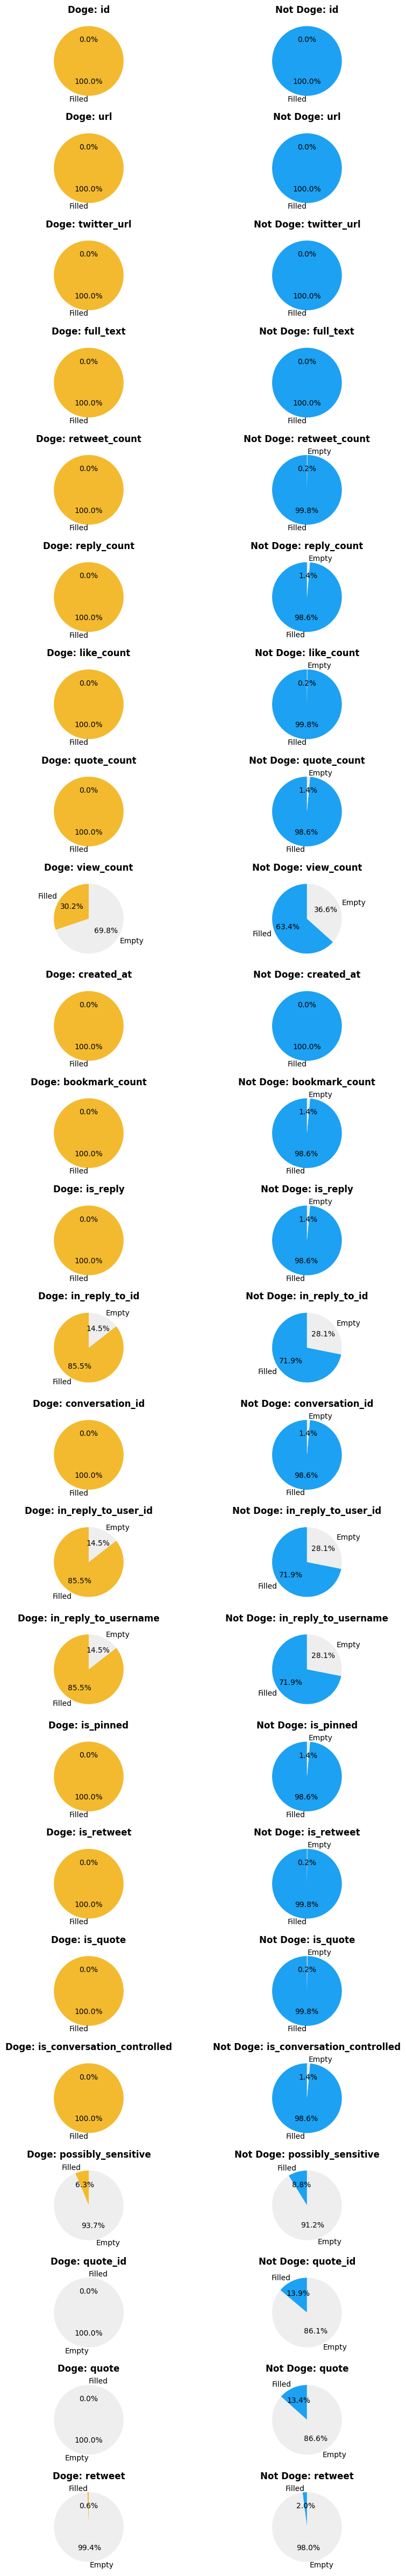

In [14]:
def plot_comparative_pie_charts(df_doge, df_not_doge):
    """
    Generates side-by-side pie charts for every column comparing
    data completeness between two DataFrames.
    """
    cols = df_doge.columns
    n_cols = len(cols)

    fig, axes = plt.subplots(n_cols, 2, figsize=(10, 2 * n_cols))

    for i, col in enumerate(cols):
        doge_filled = df_doge[col].notnull().sum()
        doge_empty = len(df_doge) - doge_filled
        #    print(f"{col} {doge_filled / (doge_filled+ doge_empty)}")

        not_doge_filled = df_not_doge[col].notnull().sum()
        not_doge_empty = len(df_not_doge) - not_doge_filled

        axes[i, 0].pie(
            [doge_filled, doge_empty],
            labels=["Filled", "Empty"] if doge_empty > 0 else ["Filled", ""],
            autopct="%1.1f%%",
            startangle=90,
            colors=["#f3ba2f", "#eeeeee"],
        )
        axes[i, 0].set_title(f"Doge: {col}", fontweight="bold")

        axes[i, 1].pie(
            [not_doge_filled, not_doge_empty],
            labels=(
                ["Filled", "Empty"] if not_doge_empty > 0 else ["Filled", ""]
            ),
            autopct="%1.1f%%",
            startangle=90,
            colors=["#1da1f2", "#eeeeee"],
        )
        axes[i, 1].set_title(f"Not Doge: {col}", fontweight="bold")

    plt.tight_layout()
    plt.show()


plot_comparative_pie_charts(musk_posts_df_dogecoin, musk_posts_df_not_dogecoin)

Data exploration reveals that the Dogecoin related subset is highly complete. Analysis of the first 20 features (excluding view_count) shows a fill rate consistently exceeding 85%, with primary attributes such as created_at and full_text being 100% populated. In contrast, the final four features (possibly_sensitive, quote_id, quote, and retweet) are significantly more sparse, with fill rates below 7% for Dogecoin related tweets. 

There is no significant or unexpected difference in the fill rate between Dogecoin-related and unrelated tweets. The observed sparsity is primarily due to the fact that many posts are original tweets rather than quotes or retweets. Furthermore, the view_count metric only began being tracked in 2023, which naturally explains the high proportion of empty values for older posts.


Engagement metrics including retweet_count, reply_count, like_count, quote_count, and bookmark_count also demonstrate 100% completeness. However, these metrics may not be perfectly accurate, because the dataset aggregates data from multiple sources scraped at different times, older posts likely reflect higher interaction counts due to their longer 'window of opportunity' to accumulate engagement.


There is little benefit to imputing values for certain features, as their absence often carries specific meaning. For example, the view_count feature was not tracked by the API in 2021, therefore, any attempt to predict or fill those values would be speculative and inaccurate. Similarly, the in_reply_to field is naturally empty when a tweet is not a reply. Populating these empty fields with artificial data would obscure the true nature of the data and reduce the feature's predictive value.

In [15]:
print(musk_posts_df_dogecoin.columns)

Index(['id', 'url', 'twitter_url', 'full_text', 'retweet_count', 'reply_count',
       'like_count', 'quote_count', 'view_count', 'created_at',
       'bookmark_count', 'is_reply', 'in_reply_to_id', 'conversation_id',
       'in_reply_to_user_id', 'in_reply_to_username', 'is_pinned',
       'is_retweet', 'is_quote', 'is_conversation_controlled',
       'possibly_sensitive', 'quote_id', 'quote', 'retweet'],
      dtype='object')


## A visualization comparing Retweet, Reply, Like, Quote, and Bookmark counts

In [16]:
def plot_comparative_engagement(
    df_doge, df_not_doge, resample_period=None, column="like_count"
):
    df_doge = df_doge.copy()
    df_doge["Category"] = "Dogecoin Posts"

    df_not_doge = df_not_doge.copy()
    df_not_doge["Category"] = "Other Posts"

    combined_df = pd.concat([df_doge, df_not_doge])
    combined_df["created_at"] = pd.to_datetime(combined_df["created_at"])

    avg_doge = df_doge[column].mean()
    avg_other = df_not_doge[column].mean()

    pct_diff = (avg_doge - avg_other) / avg_other * 100
    print(
        f"{column} averages -> Dogecoin: {avg_doge:.2f} | Other: {avg_other:.2f} | Dogecoin is {pct_diff:+.2f}% vs Other"
    )

    data_avg = None
    if resample_period:
        data_avg = (
            combined_df.set_index("created_at")
            .groupby("Category")[column]
            .resample(resample_period)
            .mean()
            .reset_index()
        )
    else:

        data_avg = combined_df.set_index("created_at").reset_index()[
            ["created_at", "Category", column]
        ]

    plt.figure(figsize=(20, 3))
    sns.lineplot(
        data=data_avg,
        x="created_at",
        y=column,
        hue="Category",
        #   palette={"Dogecoin Posts": "green", "Other Posts": "skyblue"},
        palette={"Dogecoin Posts": "red", "Other Posts": "yellow"},
        hue_order=["Other Posts", "Dogecoin Posts"],
        #  linewidth=2.5,
        markeredgecolor=None,
        linewidth=0,
        marker="o",
        markersize=1,
    )

    plt.xlim(pd.Timestamp("2010-01-01"), pd.Timestamp("2026-01-01"))

    clean_column = column.replace("_", r"\_")

    plt.title(
        f"Monthly Average Engagement $\\bf{{{clean_column}}}$: Dogecoin vs. Other Posts",
        fontsize=20,
    )
    plt.ylabel("Average Count", fontsize=16)
    plt.xlabel("Timeline", fontsize=16)
    plt.grid(True, linestyle="--", alpha=0.5)

    plt.legend(title="Post Type", fontsize=16, title_fontsize=18)
    plt.tight_layout()
    plt.show()

like_count averages -> Dogecoin: 49213.30 | Other: 41960.04 | Dogecoin is +17.29% vs Other


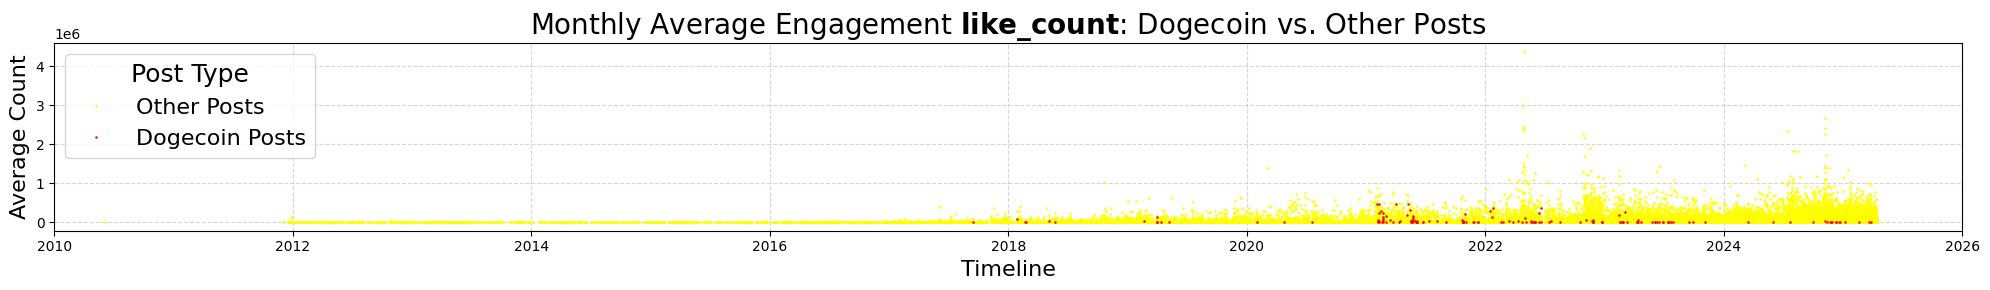

reply_count averages -> Dogecoin: 3593.15 | Other: 2395.82 | Dogecoin is +49.98% vs Other


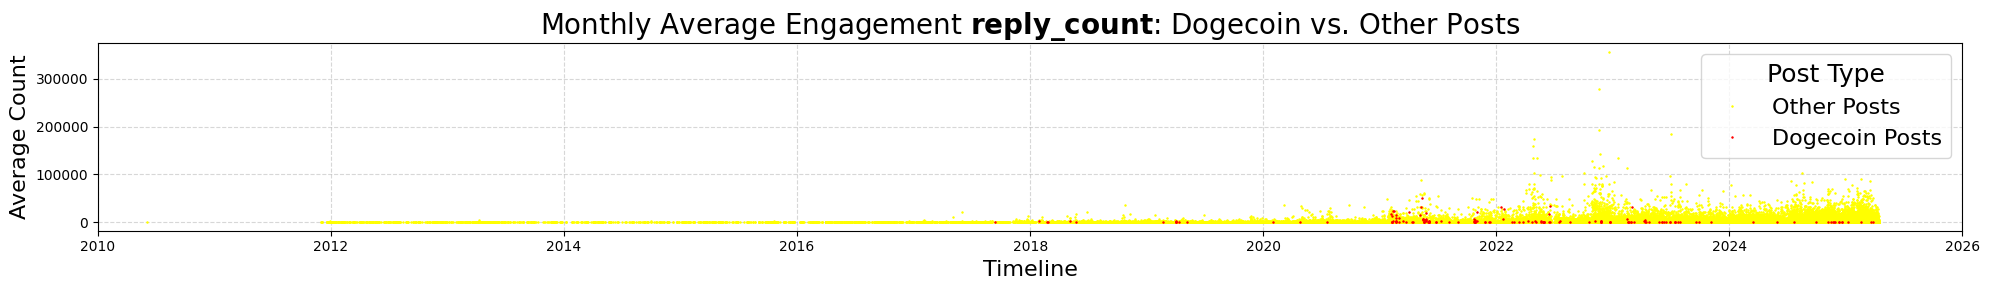

retweet_count averages -> Dogecoin: 5751.70 | Other: 5197.71 | Dogecoin is +10.66% vs Other


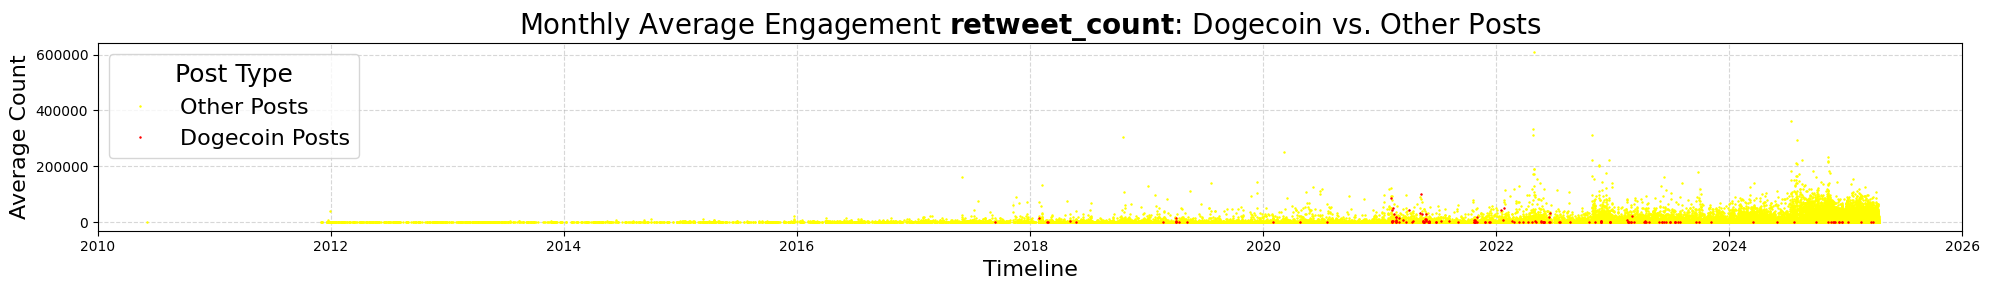

quote_count averages -> Dogecoin: 930.32 | Other: 488.04 | Dogecoin is +90.62% vs Other


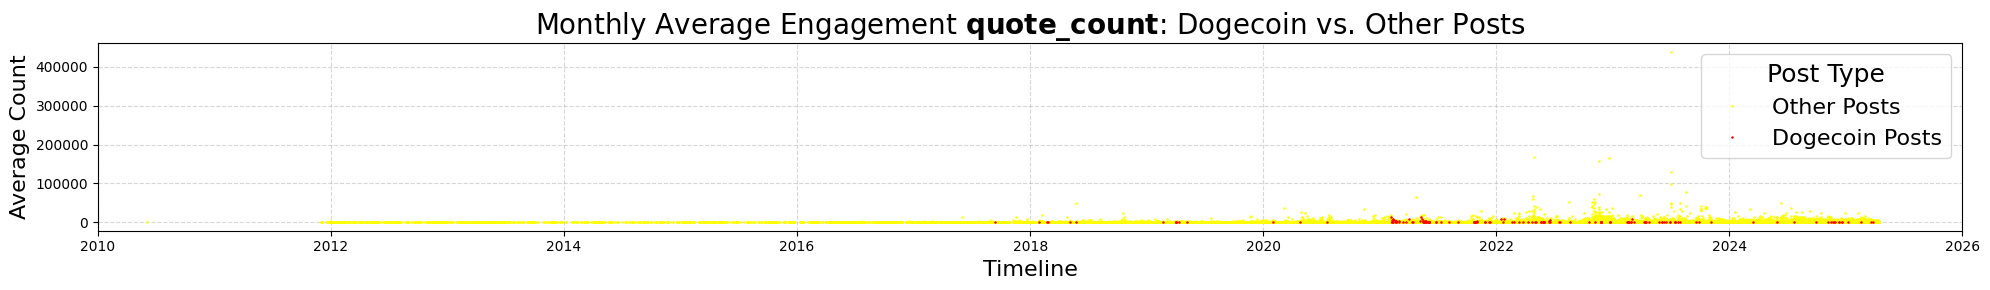

bookmark_count averages -> Dogecoin: 203.89 | Other: 820.85 | Dogecoin is -75.16% vs Other


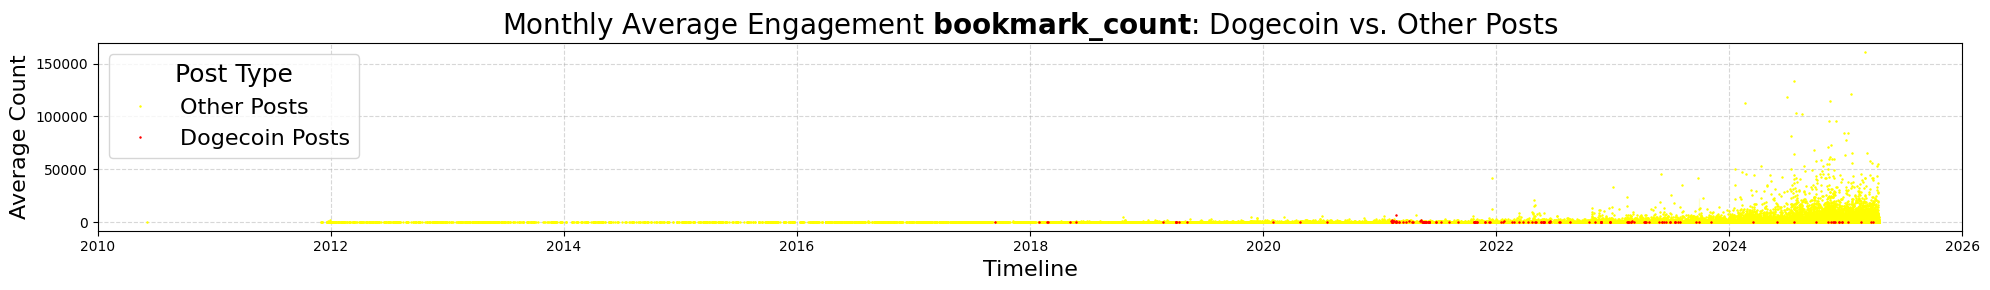

view_count averages -> Dogecoin: 2017268.96 | Other: 8848581.80 | Dogecoin is -77.20% vs Other


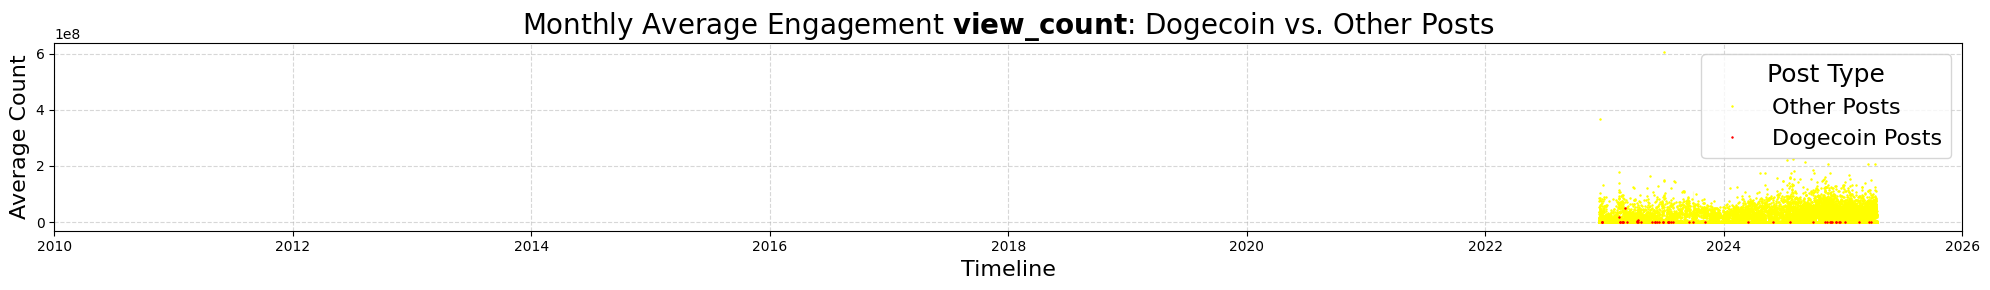

In [17]:
resample_period = "HE"
resample_period = "ME"
resample_period = "min"
resample_period = "D"
resample_period = "W"
resample_period = None

plot_comparative_engagement(
    musk_posts_df_dogecoin,
    musk_posts_df_not_dogecoin,
    resample_period=resample_period,
    column="like_count",
)
plot_comparative_engagement(
    musk_posts_df_dogecoin,
    musk_posts_df_not_dogecoin,
    resample_period=resample_period,
    column="reply_count",
)
plot_comparative_engagement(
    musk_posts_df_dogecoin,
    musk_posts_df_not_dogecoin,
    resample_period=resample_period,
    column="retweet_count",
)

plot_comparative_engagement(
    musk_posts_df_dogecoin,
    musk_posts_df_not_dogecoin,
    resample_period=resample_period,
    column="quote_count",
)

plot_comparative_engagement(
    musk_posts_df_dogecoin,
    musk_posts_df_not_dogecoin,
    resample_period=resample_period,
    column="bookmark_count",
)

plot_comparative_engagement(
    musk_posts_df_dogecoin,
    musk_posts_df_not_dogecoin,
    resample_period=resample_period,
    column="view_count",
)

On average, Dogecoin related tweets demonstrate higher popularity and engagement compared to unrelated posts. A notable exception is the view_count metric, however, this discrepancy is likely attributed to the fact that this feature only began in 2023.

Another distinct exception is the bookmark_count, which tracks how many users saved a tweet for future reference. The lower relative performance in bookmarks suggests a difference in user behavior: while users engage heavily with Dogecoin content through likes and retweets, they may perceive these updates as time-sensitive "buy now" signals rather than information intended for long term storage or later viewing and later buying.

The peak popularity of Dogecoin related tweets occurred in 2021.

## Save deduplicated and filtered data

In [18]:
loaders.save_data(
    config.PROCESSED_DIR,
    config.PROCESSED_TWEETS_DOGECOIN_PATH,
    musk_posts_df_dogecoin,
)

In [19]:
first_date = musk_posts_df_dogecoin["created_at"].min()
last_date = musk_posts_df_dogecoin["created_at"].max()

print(f"Initial Musk posts loaded: {len(musk_posts_df_dogecoin)} rows. ")
print(f"Timeline starts {first_date} ends {last_date}")

Initial Musk posts loaded: 159 rows. 
Timeline starts 2017-09-14 03:01:02+00:00 ends 2025-03-26 10:52:26+00:00
